# AdaBoost Demo

This notebook demonstrates the implementation and usage of our AdaBoost algorithm for binary classification tasks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

# Import our implementation
from adaboost import AdaBoost

## 1. Generate and Prepare Data

Let's create a simple binary classification dataset using the make_classification function.

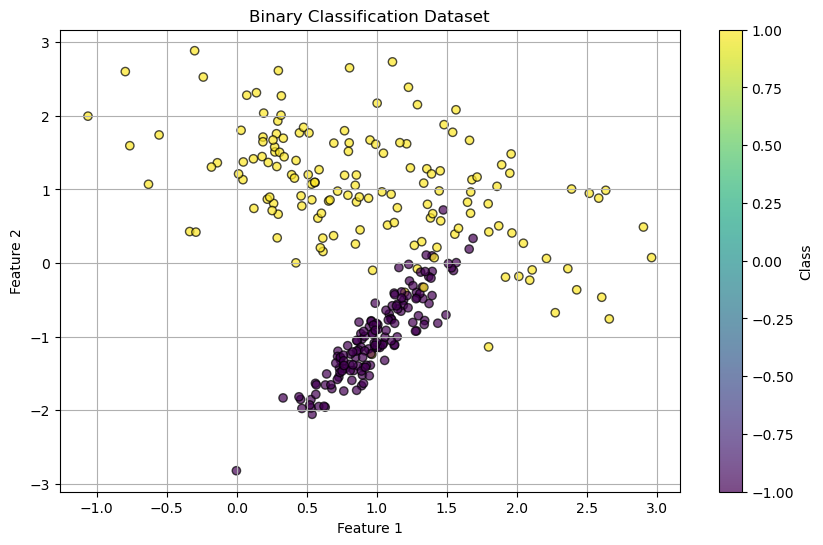

In [2]:
# Generate a binary classification dataset
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1
)

# Convert labels to -1 and 1 (required for AdaBoost)
y = np.where(y == 0, -1, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

## 2. Train Our AdaBoost Model

In [3]:
# Initialize and train our AdaBoost model
our_adaboost = AdaBoost(n_clf=10)
our_adaboost.fit(X_train_scaled, y_train)

# Make predictions
our_predictions = our_adaboost.predict(X_test_scaled)
our_accuracy = accuracy_score(y_test, our_predictions)

print(f"Our AdaBoost Accuracy: {our_accuracy:.4f}")

Our AdaBoost Accuracy: 0.9667


## 3. Compare with scikit-learn's AdaBoost

In [4]:
# Train scikit-learn's AdaBoost
sklearn_adaboost = AdaBoostClassifier(n_estimators=10, random_state=42)
sklearn_adaboost.fit(X_train_scaled, y_train)

# Make predictions
sklearn_predictions = sklearn_adaboost.predict(X_test_scaled)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"scikit-learn AdaBoost Accuracy: {sklearn_accuracy:.4f}")

scikit-learn AdaBoost Accuracy: 0.9333


## 4. Visualize Decision Boundaries

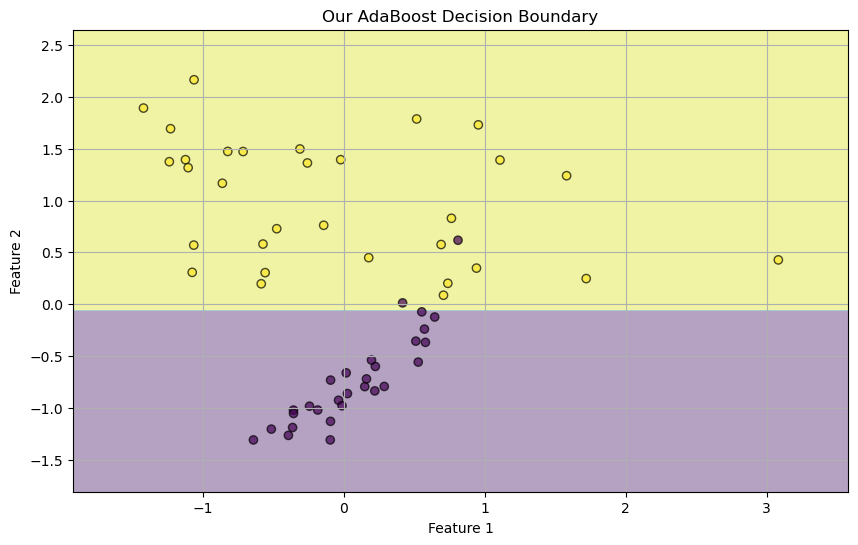

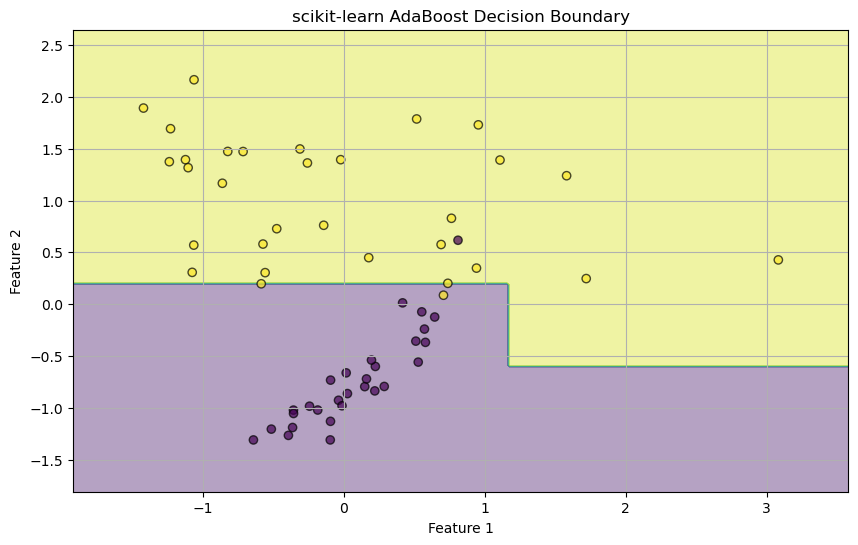

In [5]:
def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Plot decision boundaries for both implementations
plot_decision_boundary(our_adaboost, X_test_scaled, y_test, 'Our AdaBoost Decision Boundary')
plot_decision_boundary(sklearn_adaboost, X_test_scaled, y_test, 'scikit-learn AdaBoost Decision Boundary')

## 5. Visualize Confusion Matrix

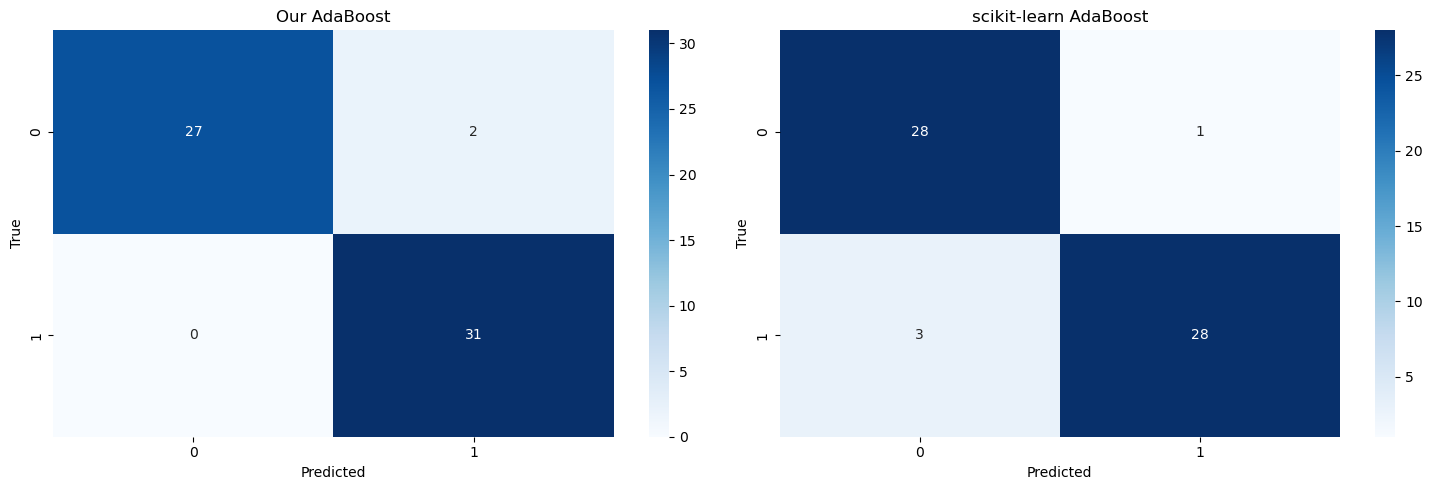

In [6]:
# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Our implementation
cm_our = confusion_matrix(y_test, our_predictions)
sns.heatmap(cm_our, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Our AdaBoost')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# scikit-learn implementation
cm_sklearn = confusion_matrix(y_test, sklearn_predictions)
sns.heatmap(cm_sklearn, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('scikit-learn AdaBoost')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

## 6. Effect of Number of Weak Learners

Let's see how the number of weak learners affects the model's performance.

Number of weak learners: 1
  Our AdaBoost accuracy: 0.9667
  scikit-learn accuracy: 0.9333
Number of weak learners: 5
  Our AdaBoost accuracy: 0.9667
  scikit-learn accuracy: 0.9333
Number of weak learners: 10
  Our AdaBoost accuracy: 0.9667
  scikit-learn accuracy: 0.9333
Number of weak learners: 20
  Our AdaBoost accuracy: 0.9667
  scikit-learn accuracy: 0.9500
Number of weak learners: 50
  Our AdaBoost accuracy: 0.9667
  scikit-learn accuracy: 0.9500


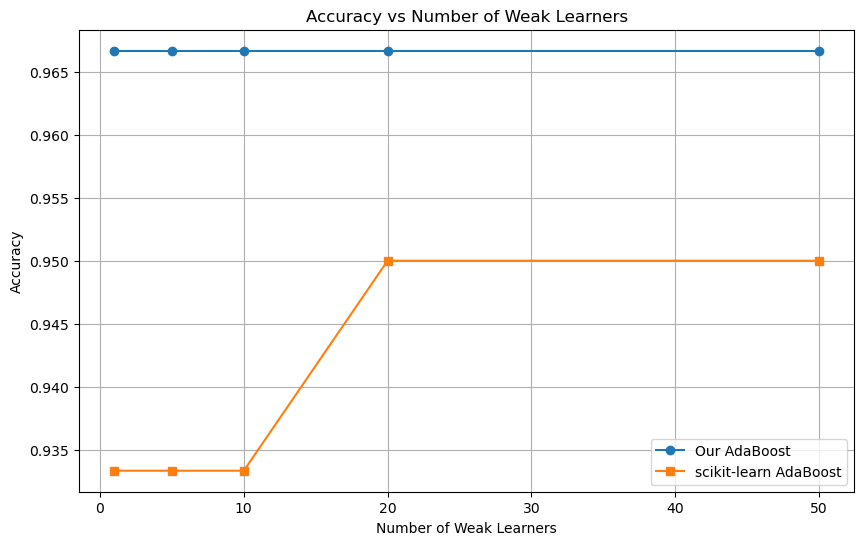

In [7]:
# Test different numbers of weak learners
n_clf_list = [1, 5, 10, 20, 50]
our_accuracies = []
sklearn_accuracies = []

for n_clf in n_clf_list:
    # Our implementation
    our_model = AdaBoost(n_clf=n_clf)
    our_model.fit(X_train_scaled, y_train)
    our_pred = our_model.predict(X_test_scaled)
    our_acc = accuracy_score(y_test, our_pred)
    our_accuracies.append(our_acc)
    
    # scikit-learn implementation
    sklearn_model = AdaBoostClassifier(n_estimators=n_clf, random_state=42)
    sklearn_model.fit(X_train_scaled, y_train)
    sklearn_pred = sklearn_model.predict(X_test_scaled)
    sklearn_acc = accuracy_score(y_test, sklearn_pred)
    sklearn_accuracies.append(sklearn_acc)
    
    print(f"Number of weak learners: {n_clf}")
    print(f"  Our AdaBoost accuracy: {our_acc:.4f}")
    print(f"  scikit-learn accuracy: {sklearn_acc:.4f}")

# Plot accuracy vs number of weak learners
plt.figure(figsize=(10, 6))
plt.plot(n_clf_list, our_accuracies, marker='o', label='Our AdaBoost')
plt.plot(n_clf_list, sklearn_accuracies, marker='s', label='scikit-learn AdaBoost')
plt.title('Accuracy vs Number of Weak Learners')
plt.xlabel('Number of Weak Learners')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 7. Visualize Individual Weak Learners

Let's visualize the decision boundaries of individual weak learners (decision stumps) in our AdaBoost model.

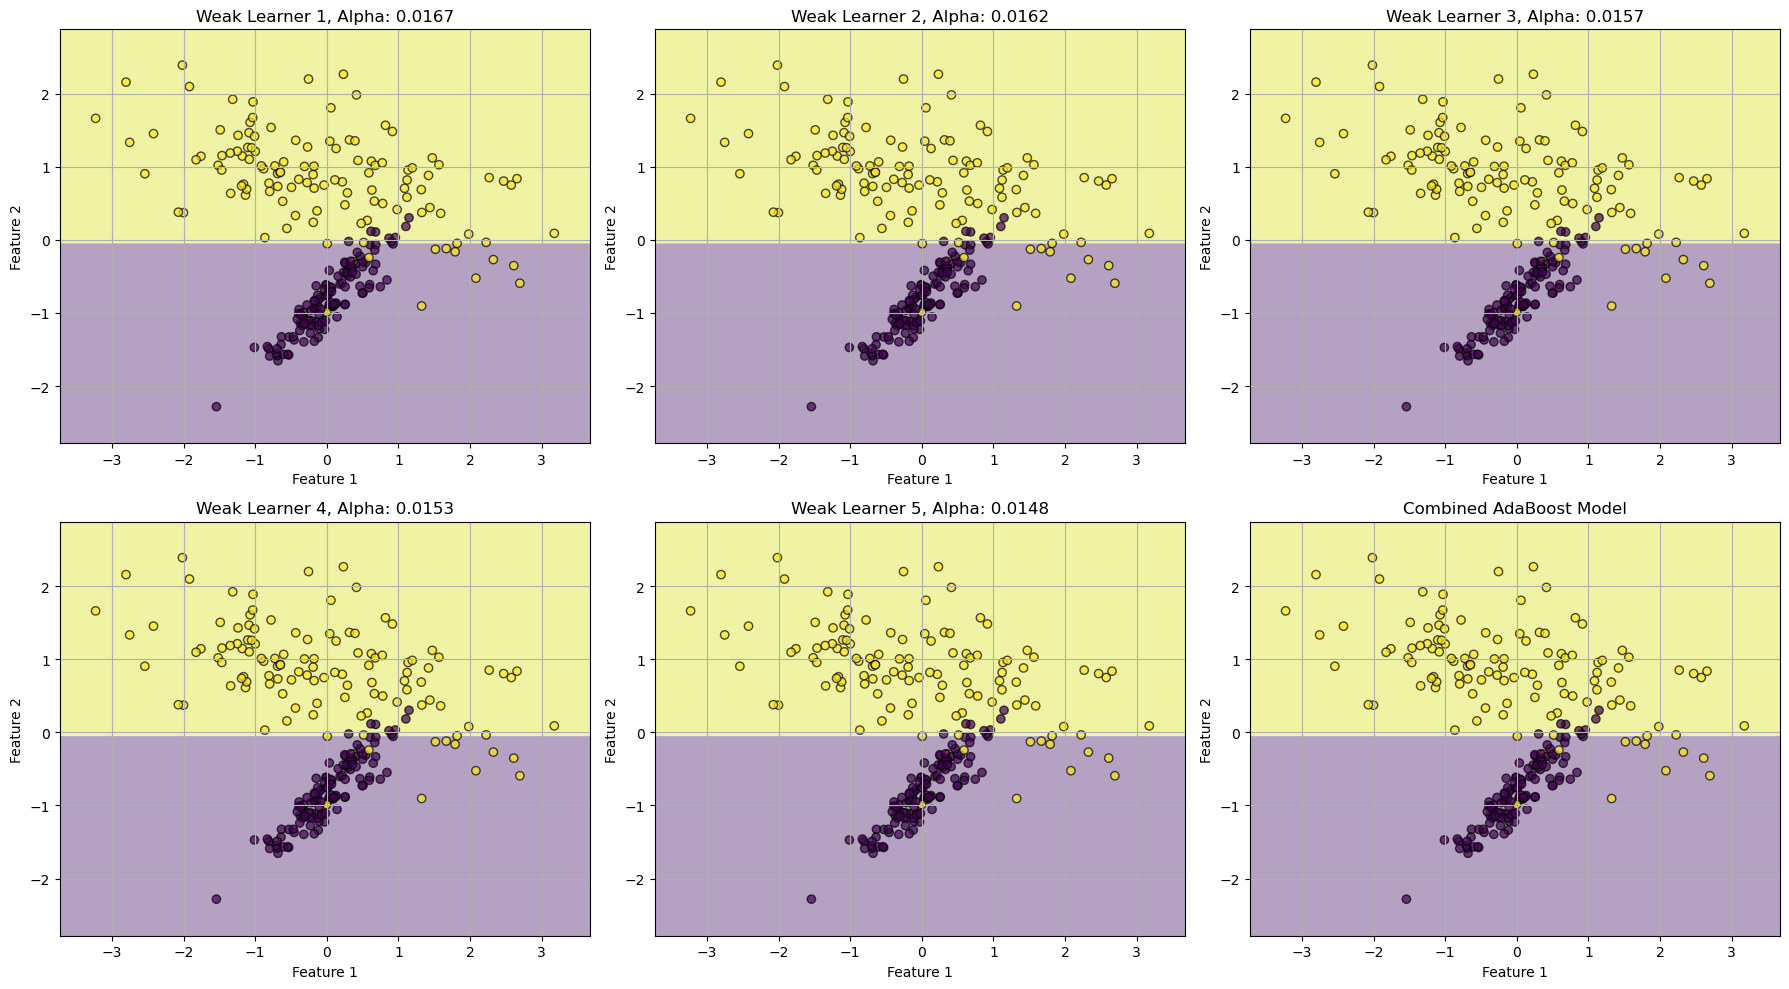

In [8]:
# Train a new AdaBoost model with 5 weak learners
adaboost = AdaBoost(n_clf=5)
adaboost.fit(X_train_scaled, y_train)

# Plot decision boundaries of individual weak learners
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot each weak learner
for i, clf in enumerate(adaboost.clfs):
    if i < 5:  # Plot only the first 5 weak learners
        # Create a mesh grid
        x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
        y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
        
        # Make predictions on mesh grid
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot
        axes[i].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
        axes[i].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolors='k', alpha=0.7)
        axes[i].set_title(f'Weak Learner {i+1}, Alpha: {clf.alpha:.4f}')
        axes[i].set_xlabel('Feature 1')
        axes[i].set_ylabel('Feature 2')
        axes[i].grid(True)
    
# Plot the combined model
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[5].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
axes[5].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolors='k', alpha=0.7)
axes[5].set_title('Combined AdaBoost Model')
axes[5].set_xlabel('Feature 1')
axes[5].set_ylabel('Feature 2')
axes[5].grid(True)

plt.tight_layout()
plt.show()

## 8. Test on a More Complex Dataset

Let's test our AdaBoost implementation on a more complex, non-linearly separable dataset.

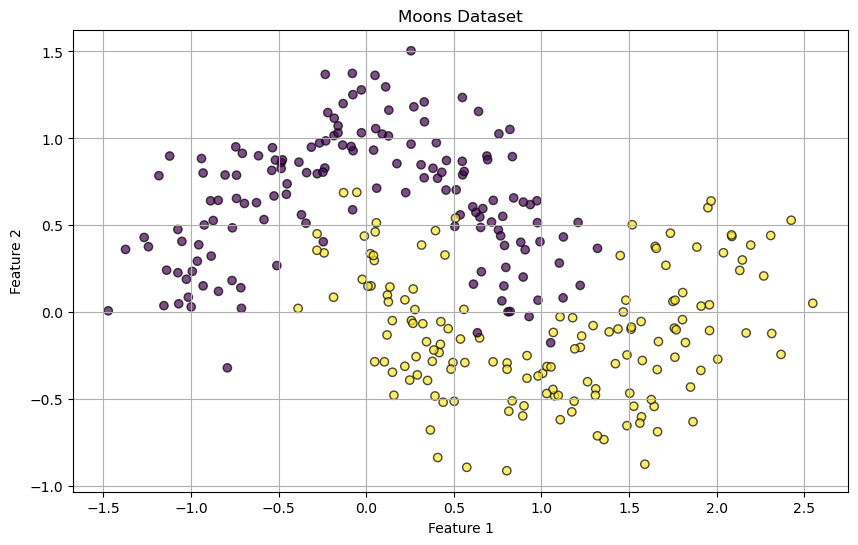

Our AdaBoost Accuracy on Moons Dataset: 0.8000


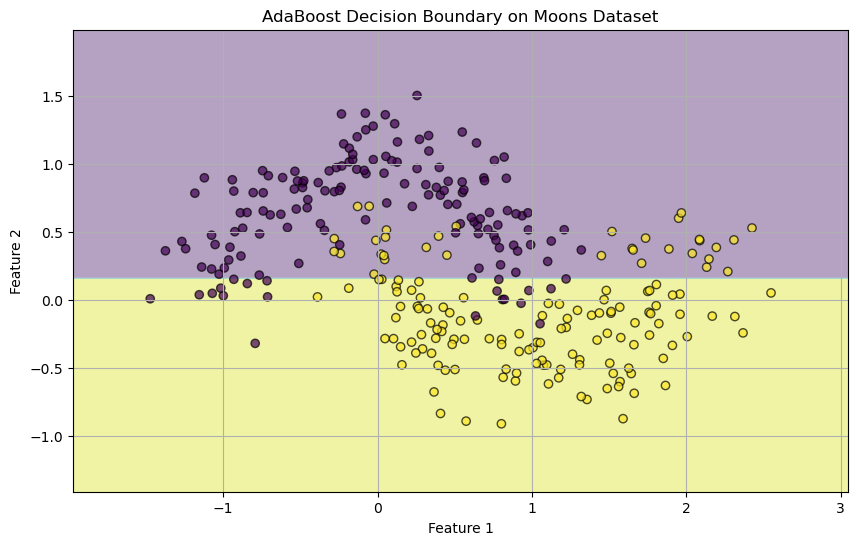

In [9]:
# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)

# Convert labels to -1 and 1
y_moons = np.where(y_moons == 0, -1, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42
)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Train our AdaBoost model with more weak learners
our_adaboost = AdaBoost(n_clf=50)
our_adaboost.fit(X_train, y_train)

# Make predictions
our_predictions = our_adaboost.predict(X_test)
our_accuracy = accuracy_score(y_test, our_predictions)

print(f"Our AdaBoost Accuracy on Moons Dataset: {our_accuracy:.4f}")

# Plot decision boundary
plot_decision_boundary(our_adaboost, X_moons, y_moons, 'AdaBoost Decision Boundary on Moons Dataset')